In [127]:
from base64 import b64encode
import hmac, hashlib, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time, urllib.request, uuid

# Change keys accordingly

# Change location or lat, lon value to look for a specific city/

In [128]:
location='delhi'
consumer_secret = ''
url = 'https://weather-ydn-yql.media.yahoo.com/forecastrss'
app_id = ''
consumer_key = ''
lat = '28.7041'
lon = '77.1025'

class YahooApi:
    def __init__(self):
        self.consumer_secret = consumer_secret
        self.url = url
        self.method = 'GET'
        self.app_id = app_id
        self.consumer_key = consumer_key
        self.concat = '&'

    def return_query_result(self):
        self.oauth = {
            'oauth_consumer_key': self.consumer_key,
            'oauth_nonce': uuid.uuid4().hex,
            'oauth_signature_method': 'HMAC-SHA1',
            'oauth_timestamp': str(int(time.time())),
            'oauth_version': '1.0'
        }
        merged_params = self.query.copy()
        merged_params.update(self.oauth)
        sorted_params = [k + '=' + urllib.parse.quote(merged_params[k], safe='') for k in sorted(merged_params.keys())]
        signature_base_str = self.method + self.concat + urllib.parse.quote(self.url,
                                                                            safe='') + self.concat + urllib.parse.quote(
            self.concat.join(sorted_params), safe='')
        composite_key = urllib.parse.quote(self.consumer_secret, safe='') + self.concat
        oauth_signature = b64encode(
            hmac.new(bytes(composite_key, 'latin-1'), bytes(signature_base_str, 'latin-1'), hashlib.sha1).digest())
        oauth_signature = oauth_signature.decode('utf-8')
        self.oauth['oauth_signature'] = oauth_signature
        auth_header = 'OAuth ' + ', '.join(['{}="{}"'.format(k, v) for k, v in self.oauth.items()])
        self.url = self.url + '?' + urllib.parse.urlencode(self.query)
        opener = urllib.request.build_opener()
        opener.addheaders = [('Authorization', auth_header),
                             ('X-Yahoo-App-Id', self.app_id),
                             ('Pragma', 'no-cache'),
                             ('User-Agent', 'Mozilla/5.0')]
        urllib.request.install_opener(opener)
        response = urllib.request.urlopen(self.url)
        data = response.read().decode('utf-8')
        del response
        del opener
        target = json.loads(data)
        return target

    def get_data_acc_to_loc(self, location, unit='c'):
        self.query = {'location': location, 'format': 'json', 'u': unit}
        return self.return_query_result()
    
    def get_data_acc_to_coord(self, lat, lon, unit='c'):
        self.query = {'lat': lat, 'lon' : lon, 'format': 'json', 'u': unit}
        return self.return_query_result()

In [129]:
def plot_temp(df):
    x = np.arange(10)
    fig = plt.figure(figsize=(15, 8)) 
    ax1 = plt.subplot(1,1,1)
    w = 0.3
    plt.xticks(x + w /2, df['day'], rotation='vertical')
    h =ax1.bar(x, df['high'], width=w, color='b', align='center')
    plt.ylabel('Temperature scale for high temp in deg. cel.')
    ax2 = ax1.twinx()
    l =ax2.bar(x + w, df['low'], width=w,color='g',align='center')
    plt.ylabel('Temperature scale for low temp in deg. cel.')
    ax.set_ylim([0,50])
    plt.legend([h, l],['High Temperature', 'Low Temperature'], loc=1)
    plt.show()

In [130]:
ya = YahooApi()
data = ya.get_data_acc_to_loc(location)

In [131]:
forecast = data['forecasts']
df = pd.DataFrame(forecast)
# print(df)


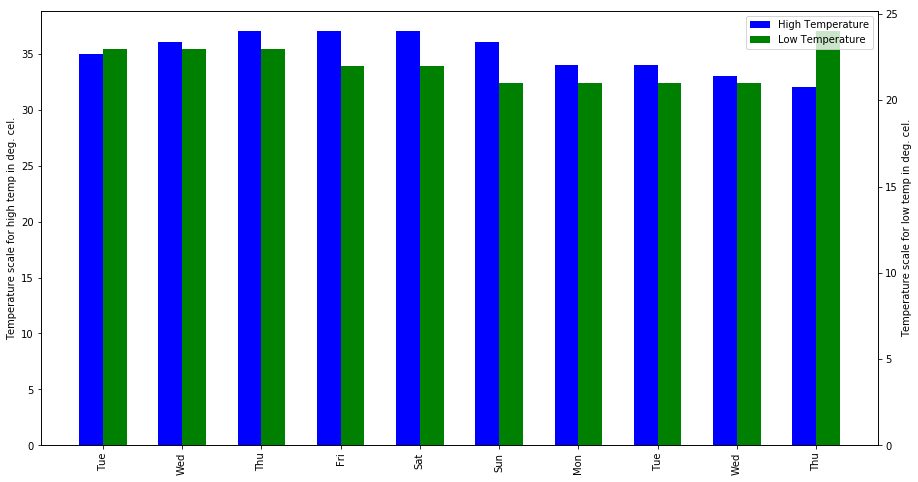

In [132]:
plot_temp(df)

In [133]:
ya = YahooApi()
data = ya.get_data_acc_to_coord(lat, lon)
forecast = data['forecasts']
df = pd.DataFrame(forecast)
# print(df)

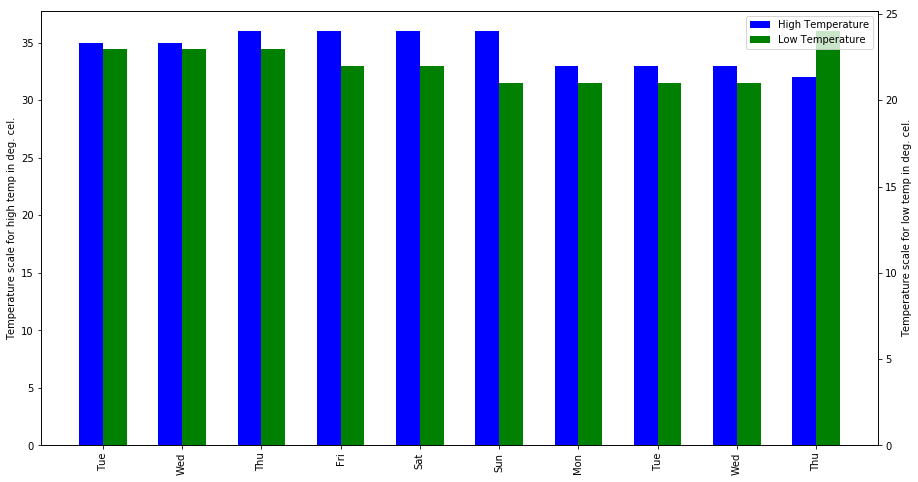

In [134]:
plot_temp(df)